The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables.
Attribute Information:

Car Name – Name of the car
Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

Steps to follow:

1.EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

2.Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

3.Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

4.Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
car_df=pd.read_csv("cars-dataset.csv")
#Creating a Copy of the Original Dataset
cars_df=car_df

  # #1 EDA & Pre-processing

In [5]:
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


Checking the Shape and Size of the Data set

In [6]:
cars_df.shape

(398, 8)

Checking for any Null Values

In [7]:
cars_df.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

Checking for any Duplicate Values in the Dataset

In [8]:
cars_df.duplicated().sum()

0

Checking the data types of the dataset

In [9]:
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

We will drop the car name column as it is not useful for the model


In [10]:
cars_df = cars_df.drop(['car name'],axis=1)

In [11]:
cars_df.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

# The Cars Dataset has some non numeric values, we will have to remove these values inorder to proceed

In [12]:
cars_df.loc[cars_df['hp']=='?']

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,?,2046,19.0,71,25.0
126,6,200.0,?,2875,17.0,74,21.0
330,4,85.0,?,1835,17.3,80,40.9
336,4,140.0,?,2905,14.3,80,23.6
354,4,100.0,?,2320,15.8,81,34.5
374,4,151.0,?,3035,20.5,82,23.0


In [13]:
cars_df = cars_df.replace('?', np.nan)
cars_df = cars_df.apply(lambda x: x.fillna(x.median()),axis=0)


In [14]:
cars_df.loc[cars_df['hp']=='?']

,cyl,disp,hp,wt,acc,yr,mpg


In [15]:
cars_df['hp']=cars_df['hp'].astype(int, axis =1)

In [16]:
cars_df.dtypes

cyl       int64
disp    float64
hp        int32
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

All of the columns of the Dataset are now Numeric

In [17]:
cars_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


# #2 Using a Pair Plot to visualize the relationship between variables

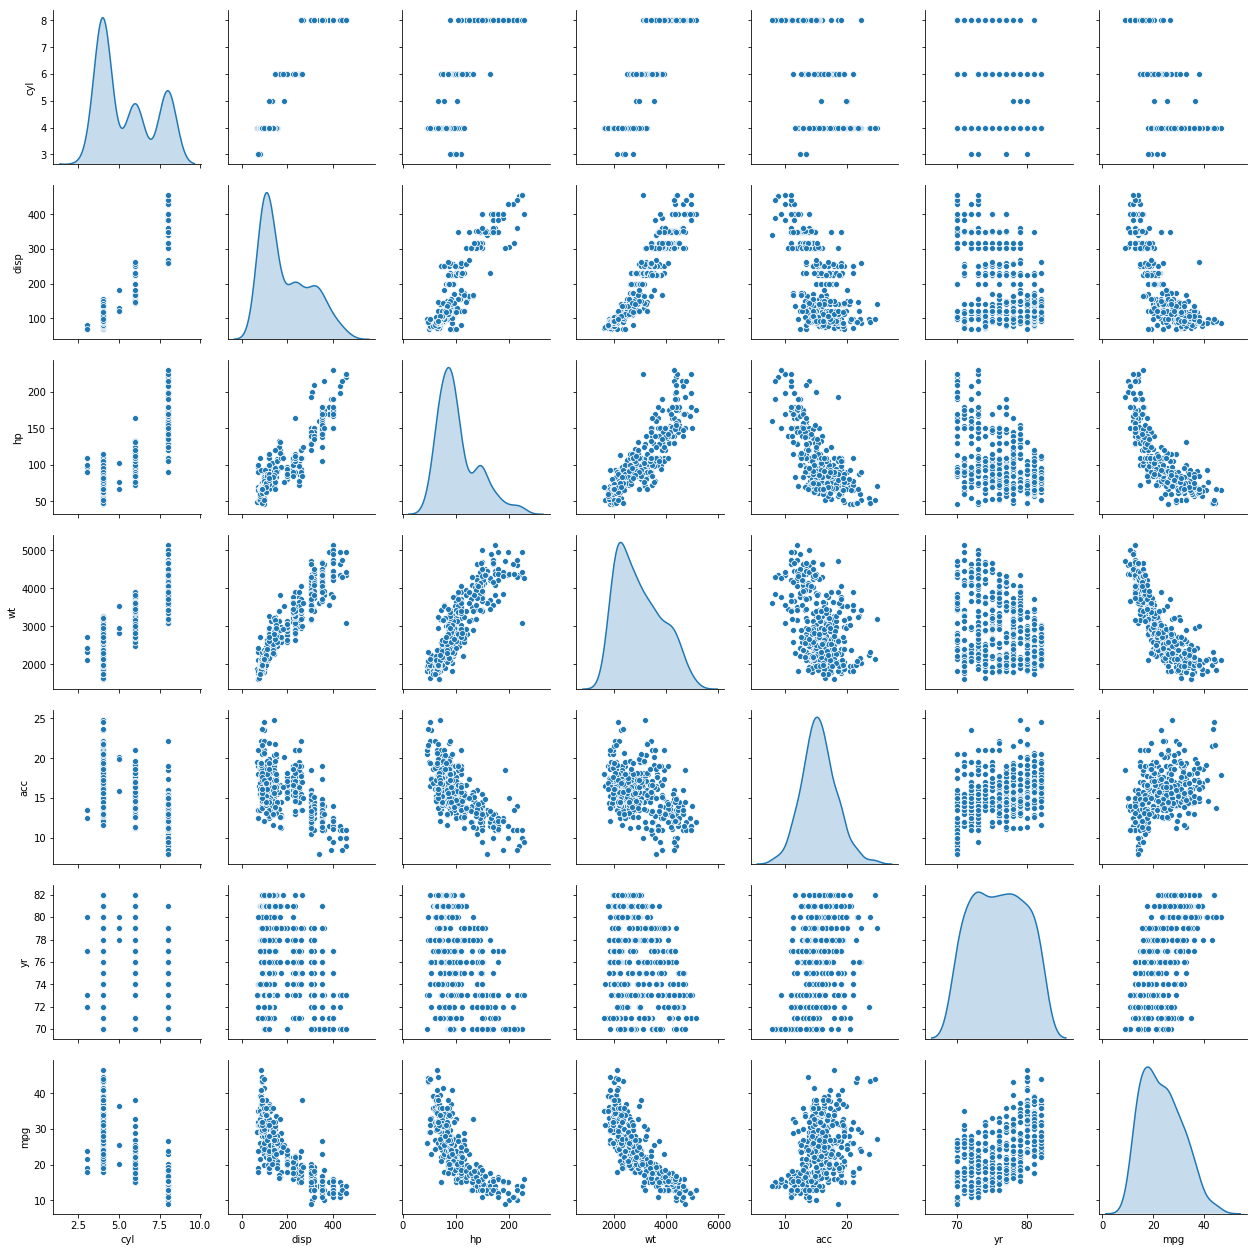

In [18]:

sns.pairplot(cars_df, diag_kind='kde')   # to plot density curve instead of histogram



### Observations
1) Cylinder column seems to have 3 different natural clusters. <br>
2) Displacement and hp seem to have 3 and 2 overlapping gaussions respectively. <br>
3) Acceleration seems to have a very normal curve and is not usefor for clustering <br>
<br> Clusters in the ranges can be any where between 2 to 9

# #3 Using K Means for Clustering

For Using Kmeans we need to first Normalize the Data, here we will use Z score for the same

In [155]:
from scipy.stats import zscore

cars_df_zscaled = cars_df.apply(zscore)

In [156]:
cars_df_zscaled.head(5)

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673277,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.590065,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197156,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197156,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935216,0.565841,-1.840117,-1.627426,-0.834543


Recreating the Pairplot to check if there are any differences due to Scaling the data

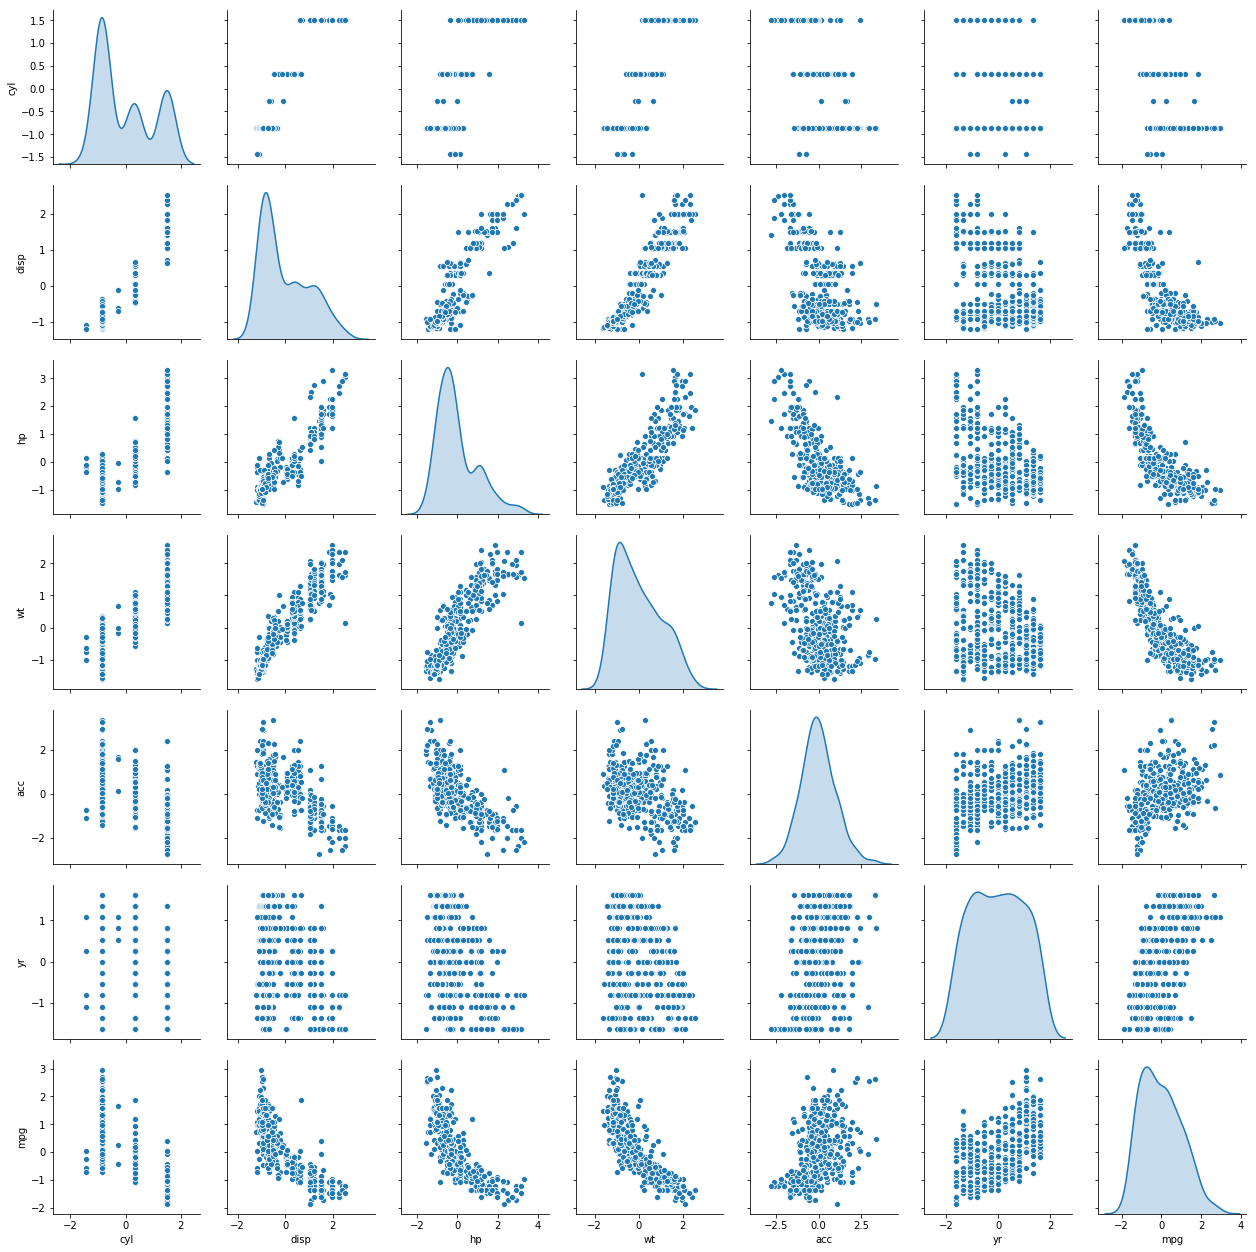

In [157]:
sns.pairplot(cars_df_zscaled, diag_kind='kde')

# The Scaling did not affect the Distribution of Data and we are good to proceed

In [158]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [159]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_df_zscaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(cars_df_zscaled, labels, metric='euclidean')) #sil value of each data point in each cluster




# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,1294.794927,0.482373
1,3,945.965952,0.353167
2,4,738.350652,0.348291
3,5,668.259959,0.317214
4,6,598.019853,0.278027
5,7,541.621760,0.277948
6,8,497.396293,0.268080
7,9,463.062983,0.266910


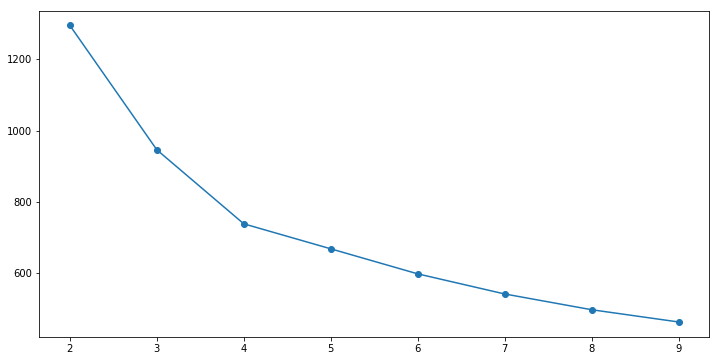

In [160]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Based on the Elbow Plot we can have any where between 3-4 Clusters

### Let us go ahead with 3 Clusters which seem to have the max seperation

In [161]:
Three_cluster = KMeans( n_clusters = 3, random_state = 42)#2354 ) #assuming 4 clusters
Three_cluster.fit(cars_df_zscaled) #assign the labels back to the data frame


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [162]:
# Get the centroids.... using function cluster_centers_

centroids = Three_cluster.cluster_centers_
centroids

array([[-0.85347696, -0.80321374, -0.67514227, -0.78549879,  0.36133415,
         0.30992304,  0.75394661],
       [ 1.49819126,  1.50068407,  1.51424017,  1.40001604, -1.07612225,
        -0.6725559 , -1.15871315],
       [ 0.35772459,  0.24687769, -0.04269131,  0.30829922,  0.28578589,
        -0.00272145, -0.47905415]])

In [163]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(cars_df_zscaled) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.853477,-0.803214,-0.675142,-0.785499,0.361334,0.309923,0.753947
1,1.498191,1.500684,1.514240,1.400016,-1.076122,-0.672556,-1.158713
2,0.357725,0.246878,-0.042691,0.308299,0.285786,-0.002721,-0.479054


In [164]:
prediction=Three_cluster.predict(cars_df_zscaled)
cars_df_zscaled["GROUP"] = prediction

In [165]:
# Cound the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. May need hierarchial clustering in that case

cars_df_zscaled.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,207,207,207,207,207,207,207
1,95,95,95,95,95,95,95
2,96,96,96,96,96,96,96


# Lets Use the Box Plot to Visualize the Clusters


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BD58B6828>,
      dtype=object)

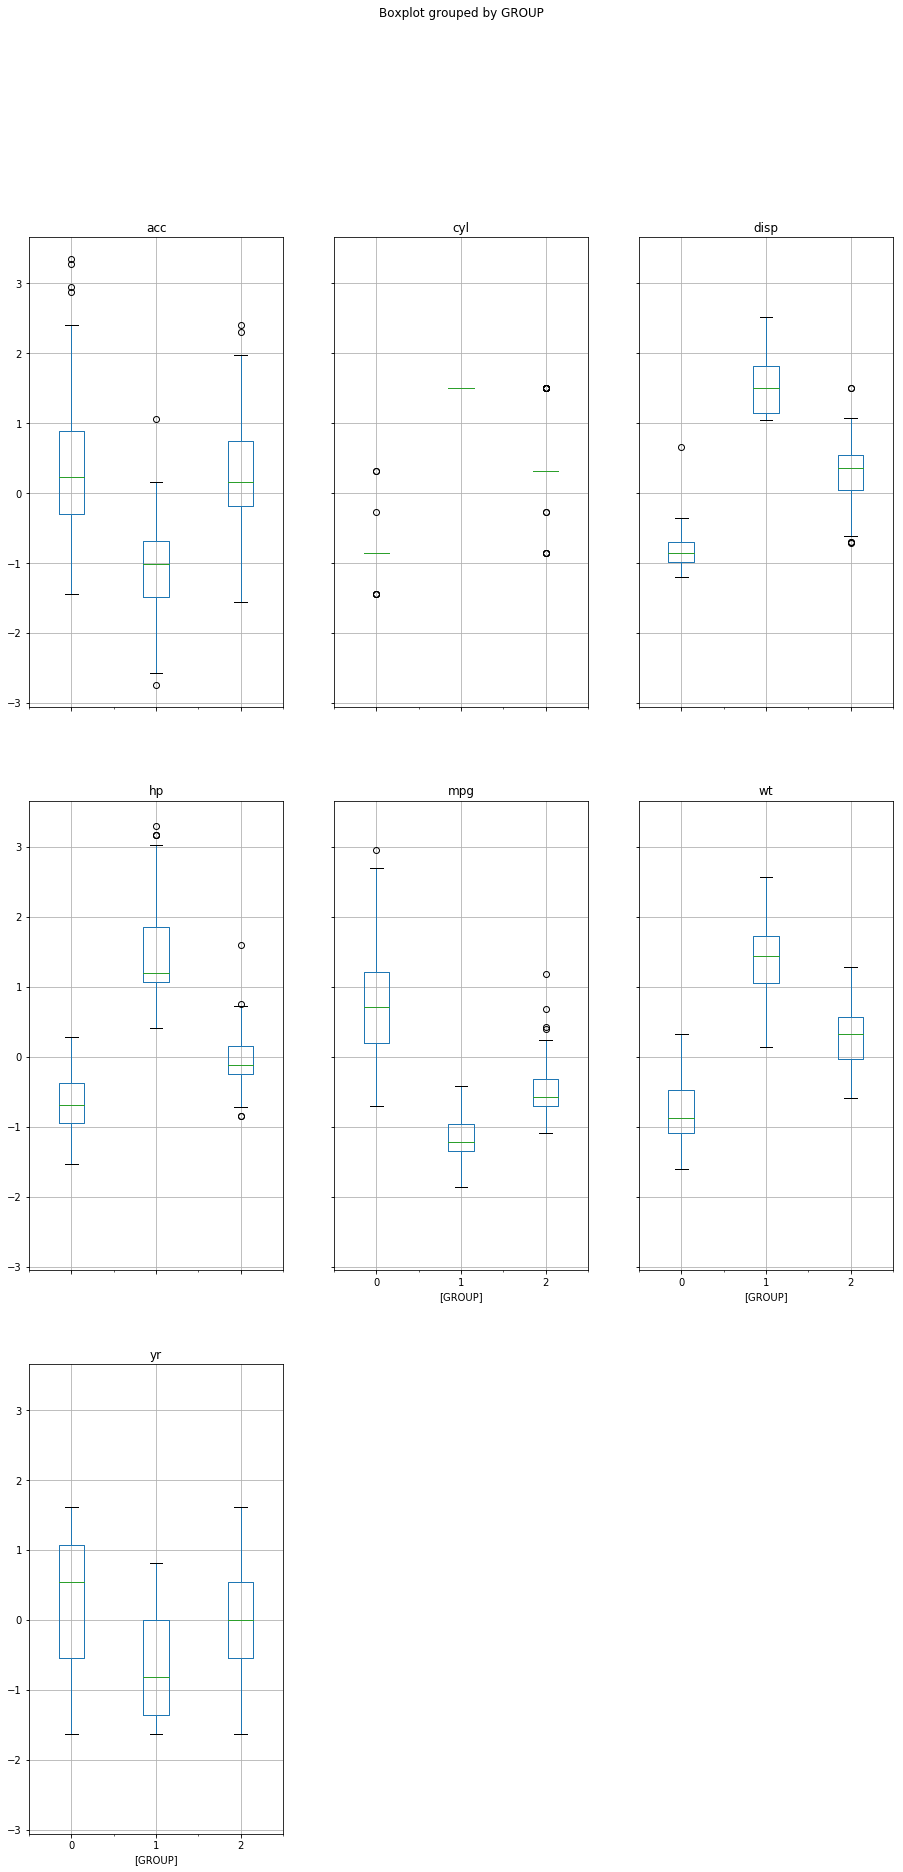

In [166]:
import matplotlib.pylab as plt

cars_df_zscaled.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40)) 


In [167]:
data = cars_df_zscaled   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cars_df_zscaled['GROUP']))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BD7A82908>,
      dtype=object)

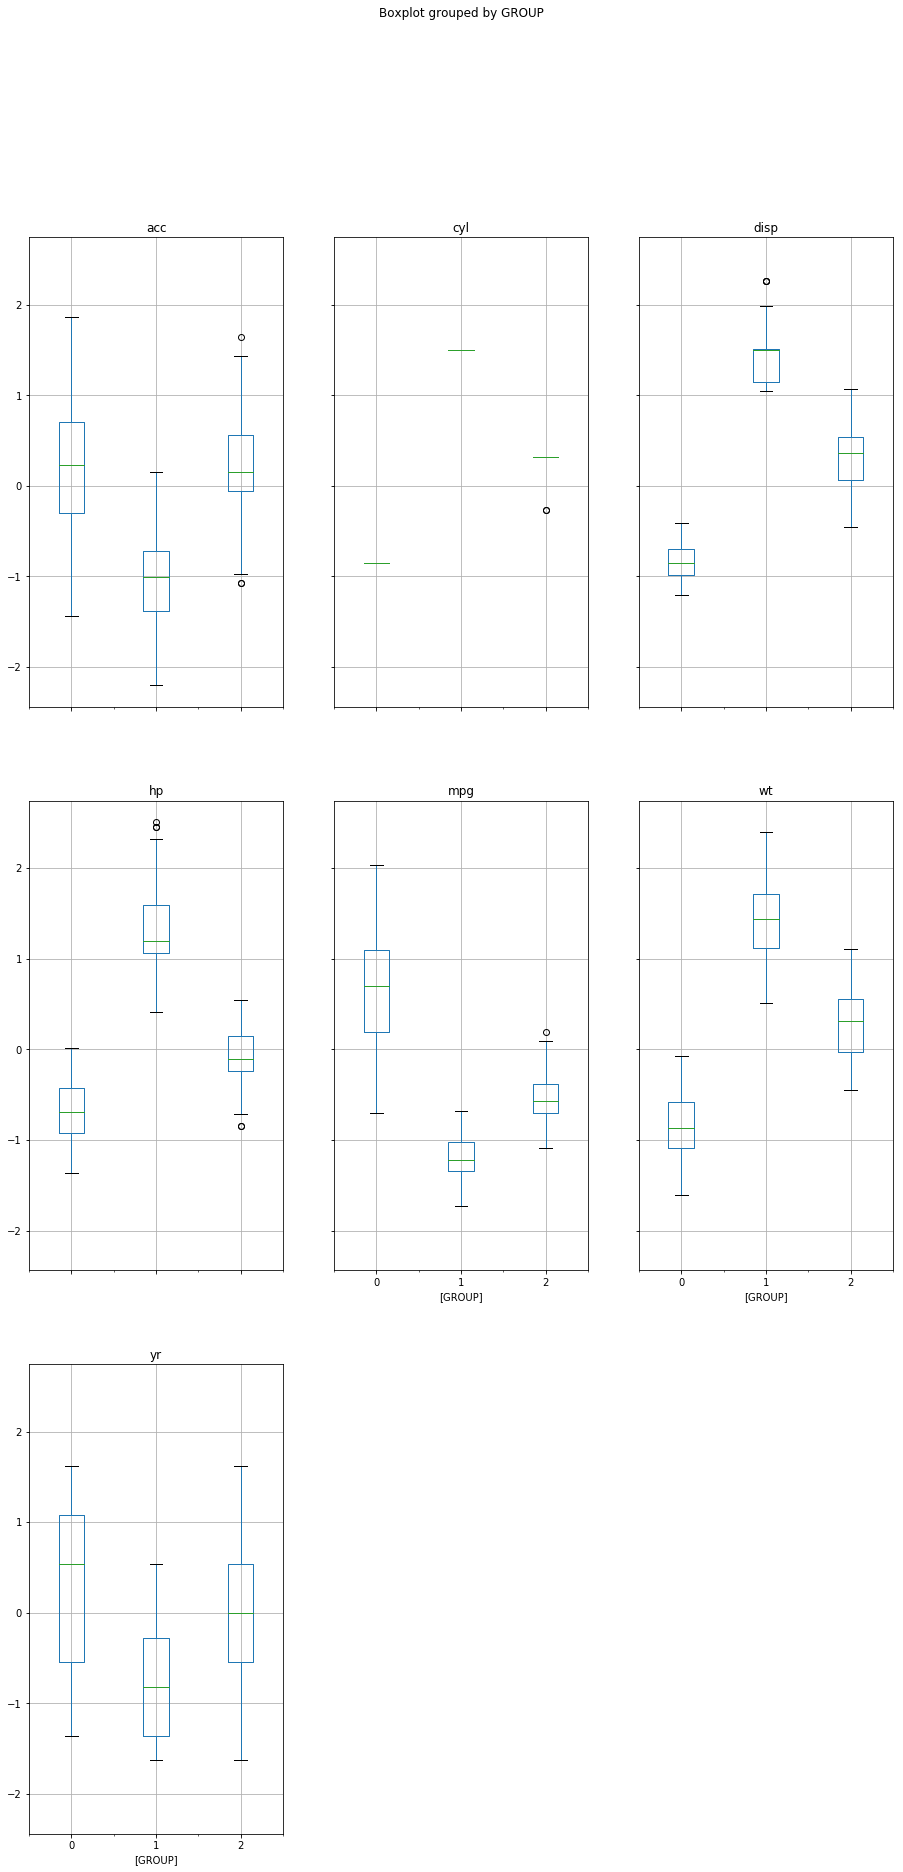

In [168]:
concat_data.boxplot(by = 'GROUP', layout=(4,3), figsize=(15, 40))

# We see there is no overlap and reduced outliers based on the above Box Plot

In [216]:
Three_cluster = KMeans( n_clusters = 3, random_state = 42)#2354 ) #assuming 4 clusters
Three_cluster.fit(concat_data) #assign the labels back to the data frame
prediction=Three_cluster.predict(concat_data)
concat_data["GROUP"] = prediction
concat_data.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,207,207,207,207,207,207,207
1,95,95,95,95,95,95,95
2,96,96,96,96,96,96,96


In [217]:
#assign the labels back to the dataframe 
concat_data['GROUP'] = prediction

prediction=Three_cluster.predict(cars_df_zscaled)
cars_df_zscaled["GROUP"] = prediction

#segregate the dataset based on the clusters
cluster1 = cars_df_zscaled[cars_df_zscaled.GROUP==0]
cluster2 = cars_df_zscaled[cars_df_zscaled.GROUP==1]
cluster3 = cars_df_zscaled[cars_df_zscaled.GROUP==2]

In [218]:
# segregate the dataset based on the clusters
cluster1 = concat_data[concat_data.GROUP==0]
cluster2 = concat_data[concat_data.GROUP==1]
cluster3 = concat_data[concat_data.GROUP==2]

In [219]:
print('Shape of Cluster 1::',cluster1.shape)
print('Shape of Cluster 2::',cluster2.shape)
print('Shape of Cluster 3::',cluster3.shape)

Shape of Cluster 1:: (207, 8)
Shape of Cluster 2:: (95, 8)
Shape of Cluster 3:: (96, 8)


# #4 Using linear regression model on different clusters and printing the coefficients of the models

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.model_selection import train_test_split

# Cluster 1 Linear Regression

In [221]:
cluster1.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'GROUP'], dtype='object')

In [222]:
X1 = cluster1.iloc[:,0:6]
y1 = cluster1.mpg
Cluster1_Regressor = LinearRegression()

In [223]:
X1.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')

In [224]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [225]:
Cluster1_Regressor.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [226]:
y1_pred=Cluster1_Regressor.predict(X1_test)

In [227]:
y1_train_predict = Cluster1_Regressor.predict(X1_train)

In [228]:
#RMSE of the train and test set for Cluster 1 

print('Rmse of Training Dataset::',np.sqrt(metrics.mean_squared_error(y1_train,y1_train_predict)))
print('Rmse of Test Dataset::',np.sqrt(metrics.mean_squared_error(y1_test,y1_pred)))

Rmse of Training Dataset:: 0.3792971285769229
Rmse of Test Dataset:: 0.3765014166164397


In [229]:
#R2 of the train and test set for Cluster 1
print('R2 for Training Dataset',metrics.r2_score(y1_train,y1_train_predict))
print('R2 for Test Dataset',metrics.r2_score(y1_test,y1_pred))

R2 for Training Dataset 0.6089931907343155
R2 for Test Dataset 0.6590697471815983


In [230]:
#coefficients
cluster1_coeff_df = pd.DataFrame(columns=X1.columns)
cluster1_coeff_df.loc[0] = Cluster1_Regressor.coef_
cluster1_coeff_df

,cyl,disp,hp,wt,acc,yr
0,0.0,-0.061754,-0.378943,-0.743344,-0.064941,0.380655


# Cluster 2 Linear Regression

In [232]:
X2 = cluster2.iloc[:,0:6]
y2 = cluster2.mpg
Cluster2_Regressor = LinearRegression()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
Cluster2_Regressor.fit(X2_train,y2_train)
y2_pred=Cluster2_Regressor.predict(X2_test)
y2_train_predict = Cluster2_Regressor.predict(X2_train)

In [233]:
#RMSE of the train and test set for Cluster 2 

print('Rmse of Training Dataset::',np.sqrt(metrics.mean_squared_error(y2_train,y2_train_predict)))
print('Rmse of Test Dataset::',np.sqrt(metrics.mean_squared_error(y2_test,y2_pred)))

Rmse of Training Dataset:: 0.1983071428033032
Rmse of Test Dataset:: 0.18616977199246365


In [234]:
#R2 of the train and test set for Cluster 2
print('R2 for Training Dataset',metrics.r2_score(y2_train,y2_train_predict))
print('R2 for Test Dataset',metrics.r2_score(y2_test,y2_pred))

R2 for Training Dataset 0.2966532469086922
R2 for Test Dataset 0.21560636038051195


In [210]:
#coefficients
cluster2_coeff_df = pd.DataFrame(columns=X2.columns)
cluster2_coeff_df.loc[0] = Cluster2_Regressor.coef_
cluster2_coeff_df

,cyl,disp,hp,wt,acc
0,-0.19238,-0.248939,-0.046827,-0.068244,-0.058683


# Cluster 3 Linear Regression

In [235]:
X3 = cluster3.iloc[:,0:6]
y3 = cluster3.mpg
Cluster3_Regressor = LinearRegression()
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
Cluster3_Regressor.fit(X3_train,y3_train)
y3_pred=Cluster2_Regressor.predict(X3_test)
y3_train_predict = Cluster2_Regressor.predict(X3_train)

In [236]:
#RMSE of the train and test set for Cluster 3 

print('Rmse of Training Dataset::',np.sqrt(metrics.mean_squared_error(y3_train,y3_train_predict)))
print('Rmse of Test Dataset::',np.sqrt(metrics.mean_squared_error(y3_test,y3_pred)))

Rmse of Training Dataset:: 0.25058269125107285
Rmse of Test Dataset:: 0.2393392247843611


In [237]:
#R2 of the train and test set for Cluster 3
print('R2 for Training Dataset',metrics.r2_score(y3_train,y3_train_predict))
print('R2 for Test Dataset',metrics.r2_score(y3_test,y3_pred))

R2 for Training Dataset 0.19819875843926515
R2 for Test Dataset 0.20551684493509248


In [238]:
from sklearn import metrics
print(Cluster2_Regressor.score(X3_test,y3_test))

0.20551684493509248


In [239]:
#coefficients
cluster3_coeff_df = pd.DataFrame(columns=X3.columns)
cluster3_coeff_df.loc[0] = Cluster3_Regressor.coef_
cluster3_coeff_df

,cyl,disp,hp,wt,acc,yr
0,-0.025044,-0.179108,-0.100161,-0.110185,-0.117924,0.121167


# Due to the less number of Records in the cluster the performance of linear regression is not good.